In [1]:
# !conda install talos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
# %matplotlib inline

In [267]:
df = pd.read_csv('covid19-thai-recorded_backup.csv',  header=None, names=['date','patients'])
df['patients'] = df['patients'].astype(int)
df.pivot_table(values = 'patients',index='date')

,patients
date,
2020-03-20,322
2020-03-21,411
2020-03-22,599
2020-03-23,721
2020-03-24,827
2020-03-25,934
2020-03-26,1045
2020-03-27,1136


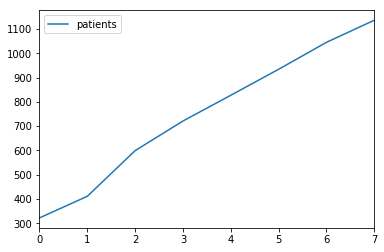

In [268]:
df.plot()

Text(0.5,1,'COVID19 in Thailand')

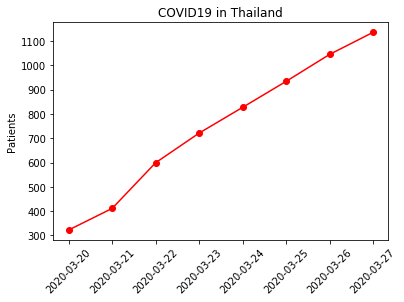

In [269]:

plt.plot(df['date'], df['patients'], 'r-',marker='o') # 'r' is the color red
# plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Patients')
plt.title('COVID19 in Thailand')


In [270]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                   ('linear', LinearRegression(fit_intercept=False))])

 # fit to an order-3 polynomial data
x = np.arange(len( df['patients']))
y = np.array( df['patients'])

model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_

array([ 308.95454545,  137.63095238,   -0.45021645,   -0.34090909])

In [271]:
x = np.arange(len( df['patients']) + 3)
y = np.zeros(len(x))

for i in range(len(x)):
    y[i] = model.predict(x[i])

In [277]:
#predition
pred = pd.DataFrame( {'2020-20-28':model.predict(len( df['patients']) + 1) })
pred_idx = pd.DataFrame({'date': ['2020-20-28']})



In [280]:

idx = pd.concat([df['date'], pred_idx['date']],axis=0)

# [data(numTimeStepsTrain) YPred]
# date_axis.concat([df['date'] ,'2020-20-28'])
print(idx) 

0    2020-03-20
1    2020-03-21
2    2020-03-22
3    2020-03-23
4    2020-03-24
5    2020-03-25
6    2020-03-26
7    2020-03-27
0    2020-20-28
Name: date, dtype: object


In [284]:
 pred_idx['date'][0] 

'2020-20-28'

/Users/TopBook/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """
/Users/TopBook/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:901: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  encoding = "utf-8"
/Users/TopBook/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:156: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  # so we need to recognize the string "None" and convert


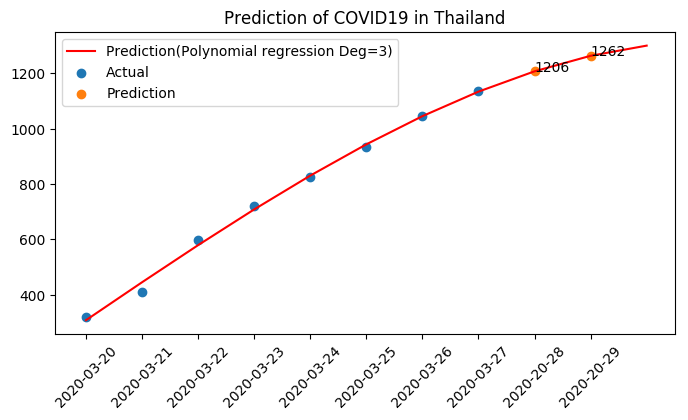

In [321]:
plt.figure(figsize=(8,4), dpi=100)
plt.plot(x, y,color = 'red', label="Prediction(Polynomial regression Deg=3)")

plt.scatter( df['date'] ,  df['patients'] , label='Actual')
plt.hold(True)

X_label = ['2020-20-28','2020-20-29'] 
y_pred = [  int(model.predict( len( df['patients'] ))), 
          int(model.predict(len( df['patients'])+1 ) ) ] 

n = [str(y_pred[0]),str(y_pred[1])]
plt.scatter(X_label ,  y_pred , label='Prediction')
for i, txt in enumerate( n ):
    plt.annotate( txt, (X_label [i], y_pred [i] ))

plt.title('Prediction of COVID19 in Thailand')
plt.xticks(rotation=45)
plt.legend()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
values = [7, 57, 121, 192, 123, 240, 546]
labels = ['1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s']

plt.plot(range(len(labels)), values, 'bo') # Plotting data
plt.xticks(range(len(labels)), labels) # Redefining x-axis labels

for i, v in enumerate(values):
    ax.text(i, v+25, "%d" %v, ha="center")
plt.ylim(-10, 595)